## **Is this a fair coin?**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adelval1/teaching/blob/master/Coin_flipping.ipynb)

In this exercise we are going to explore the impact of choosing different priors and increasing the number of observations.

Suppose I told you that I had been to Las Vegas for my holidays, and had come across a very strange coin in one of the casinos; given that I had observed 4 heads in 11 flips, do you think it was a fair coin?

In [ ]:
import pymc3 as pm
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import binom
import seaborn as sns

We are going to infer a parameter which defines the degree of fairness of a coin. This is expressed as a probability parameter $H$, which represents the probability of being successful (getting heads) in a binary (heads/tails) experiment. A fair coin would have $H = 0.5$.

The statistical model which defines the coin flipping process is the binomial distribution which expresses the probability of obtainig the data "$R$ heads in $N$ tosses" expressed as: $\mathcal{P}(\mathrm{data} \vert H) = H^{R}(1-H)^{N-R}$. In this example we use flat priors for $H$. You can see how the posterior evolves as more observations come in.

Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 7946.10it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 5705.48it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 6445.61it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 9614.66it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 5489.05it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


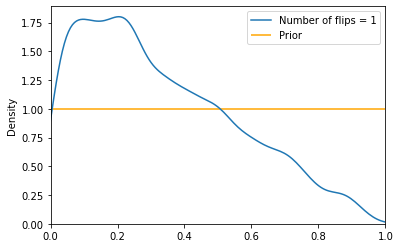

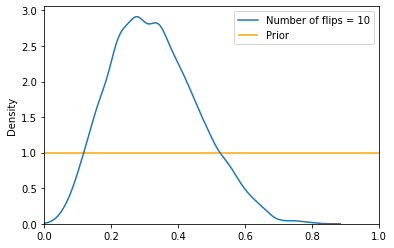

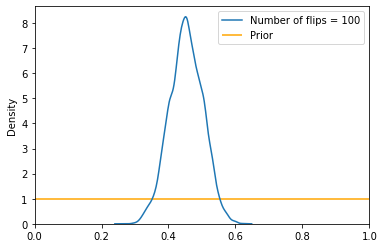

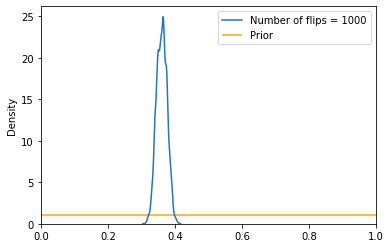

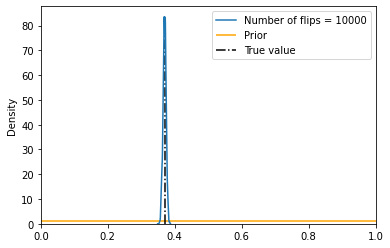

In [ ]:
h_true = 0.37
number_flips_periods = 5
for i in range(number_flips_periods):
  n=np.power(10,i)
  X = binom.rvs(n=n, p=h_true)
  with pm.Model():
    h = pm.Uniform('H',lower=0.,upper=1.) # Prior
    y_obs = pm.Binomial('y_obs', p=h, n=n, observed=X) # Likelihood
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, chains=1)
  fig=plt.figure()
  sns.kdeplot(trace['H'],label='Number of flips = '+str(np.power(10,i)))
  plt.hlines(1.,0.,1.,color='orange',label='Prior')
  plt.xlim(0.,1.)
  plt.legend(loc='best')

plt.vlines(0.37,0.,80.,linestyle='dashdot',label='True value')
plt.xlim(0.,1.)
plt.legend(loc='best')

The uniform assignment of the previous part was chosen mostly for its simplicity; it is just a naive way of encoding a lot of initial ignorance about the coin. How would our inference about the fairness of the coin have changed if we had chosen a different prior?. In the following snippet we use a Gaussian prior, centered in a fair coin with $H = 0.5$.


Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 9240.71it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 7464.66it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 7950.99it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 7495.86it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 6878.60it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


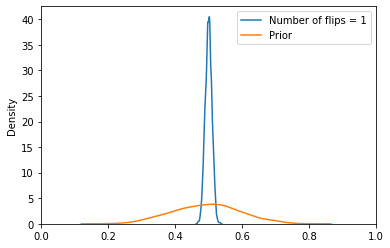

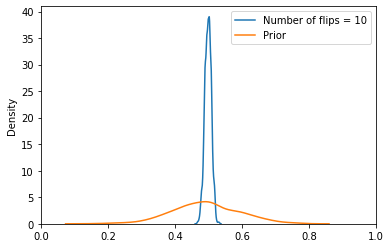

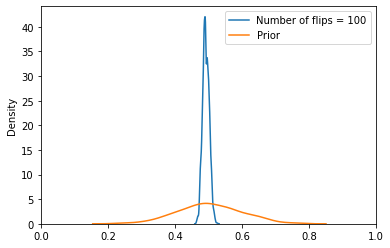

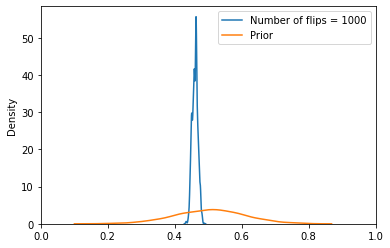

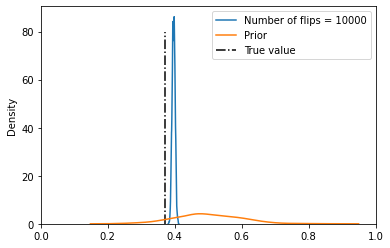

In [ ]:
for i in range(number_flips_periods):
  n=np.power(10,i)
  X = binom.rvs(n=n, p=h_true)
  with pm.Model():
    h = pm.Normal('H',mu=0.5,sigma=0.01) # Prior
    y_obs = pm.Binomial('y_obs', p=h, n=n, observed=X) # Likelihood
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, chains=1)
  fig=plt.figure()
  sns.kdeplot(trace['H'],label='Number of flips = '+str(np.power(10,i)))
  x = np.random.normal(0.5,0.1,1000)
  sns.kdeplot(x,label='Prior')
  plt.xlim(0.,1.)
  plt.legend(loc='best')

plt.vlines(0.37,0.,80.,linestyle='dashdot',label='True value')
plt.xlim(0.,1.)
plt.legend(loc='best')

The following snippet uses beta priors, where the probability masses are displaced towards the edges of the prior domain

Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 8861.02it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 6854.21it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 6448.33it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 6211.09it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [H]
100%|██████████| 10500/10500 [00:01<00:00, 6144.09it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


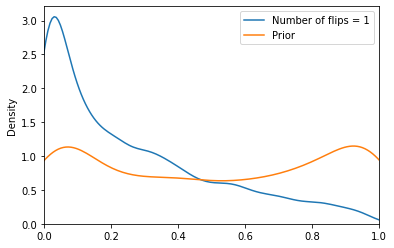

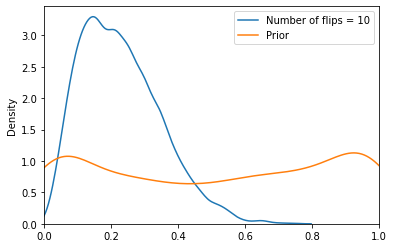

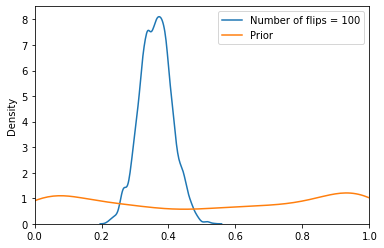

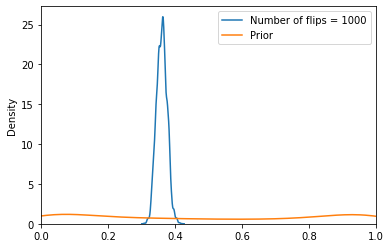

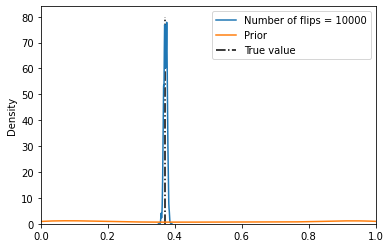

In [ ]:
for i in range(number_flips_periods):
  n=np.power(10,i)
  X = binom.rvs(n=n, p=h_true)
  with pm.Model():
    h = pm.Beta('H',alpha=0.5,beta=0.5) # Prior
    y_obs = pm.Binomial('y_obs', p=h, n=n, observed=X) # Likelihood
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, chains=1)
  fig=plt.figure()
  sns.kdeplot(trace['H'],label='Number of flips = '+str(np.power(10,i)))
  x = np.random.beta(0.5,0.5,1000)
  sns.kdeplot(x,label='Prior')
  plt.xlim(0.,1.)
  plt.legend(loc='best')

plt.vlines(0.37,0.,80.,linestyle='dashdot',label='True value')
plt.xlim(0.,1.)
plt.legend(loc='best')

The outcome of only a few flips tells us little about the fairness of the coin. Our state of knowledge after the analysis of these data is, therefore, strongly dependent on what we knew or assumed before the results; hence, the posteriors are somewhat different. As the empirical evidence grows, we are eventually led to the same conclusions irrespective of our initial beliefs; the posterior pdf is then dominated by the likelihood function, and the choice of the prior becomes largely irrelevant.